# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

200
He encontrado 27 tablas en total
  Rank                 Song                 Artist(s) Streams (billions)  \
0    1    "Blinding Lights"                The Weeknd              4.804   
1    2       "Shape of You"                Ed Sheeran              4.324   
2    3  "Someone You Loved"             Lewis Capaldi              3.876   
3    4            "Starboy"  The Weeknd and Daft Punk              3.853   
4    5          "As It Was"              Harry Styles              3.846   

        Release date Ref.  
0   29 November 2019  [2]  
1     6 January 2017  [3]  
2    8 November 2018  [4]  
3  21 September 2016  [5]  
4       1 April 2022  [6]  
   Rank                 Song                         Artist  \
0     1    "Blinding Lights"                     The Weeknd   
1     2       "Shape of You"                     Ed Sheeran   
2     3  "Someone You Loved"                  Lewis Capaldi   
3     4            "Starboy"       The Weeknd and Daft Punk   
4     5          "As It

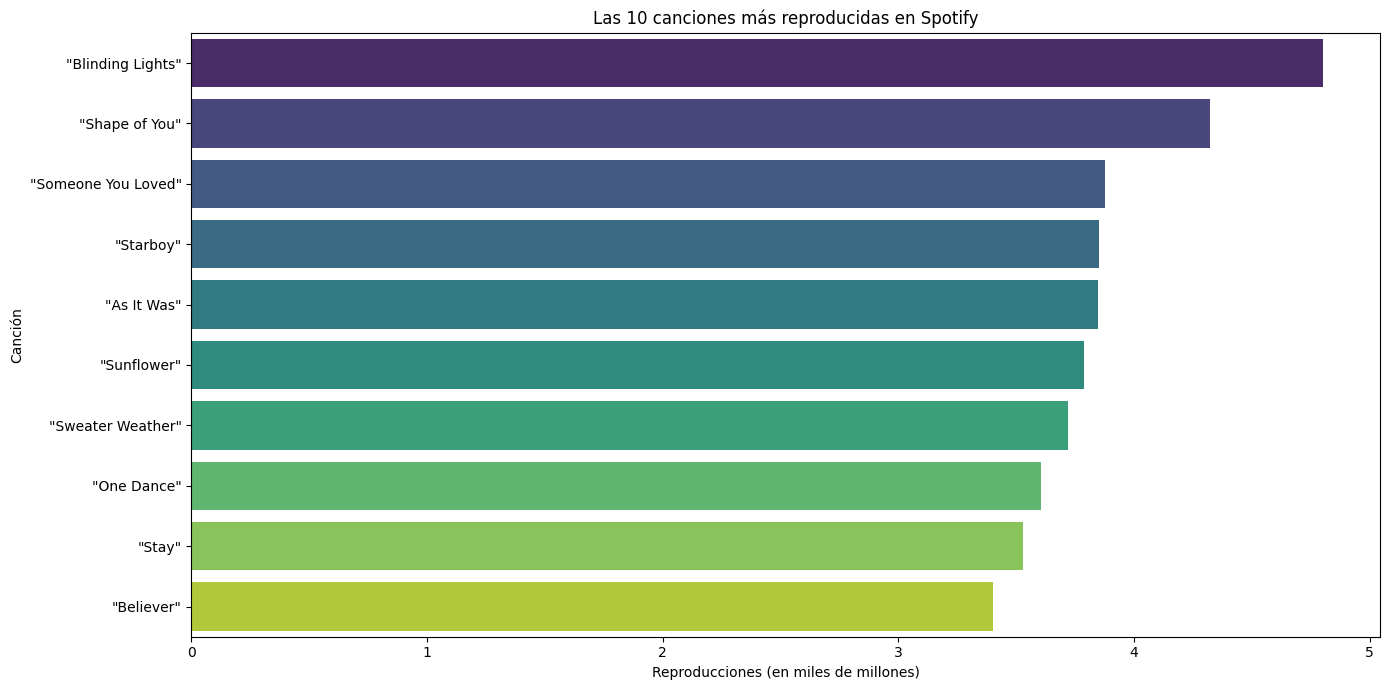

In [2]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

import requests 
from bs4 import BeautifulSoup
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import io

# Conectamos
url = "https://en.wikipedia.org/wiki/List_of_Spotify_streaming_records"

solicitud = requests.get(url)

print (solicitud.status_code)

# Extraemos
html = io.StringIO(solicitud.text)
tablas = pd.read_html(html)

print(f"He encontrado {len(tablas)} tablas en total")
# Comprobamos
df = tablas[0]

print (df.head())

# Limpiamos con regex

df.columns = ["Rank", "Song", "Artist", "Streams (billions)", "Date released", "Reference"]

df["Song"] = df["Song"].str.replace(r"\[.*?\]", "", regex=True)
df["Artist"] = df["Artist"].str.replace(r"\[.*?\]", "", regex=True)

df = df[df["Streams (billions)"].astype(str).str.contains(r"^\d+(?:\.\d+)?$", na=False)].copy()


df["Streams (billions)"] = df["Streams (billions)"].astype(float)


df["Date released"] = pd.to_datetime(df["Date released"], errors="coerce")

print(df)

# OK

# Crear base de datos y guardarla en sqlite

conn = sqlite3.connect("top_canciones_spotify.db")
df.to_sql("las_mas_reproducidas", conn, if_exists="replace", index=False)
cursor = conn.cursor()
cursor.execute("SELECT COUNT(*) FROM las_mas_reproducidas")
print("Rows inserted:", cursor.fetchone()[0])

conn.commit()
conn.close()


# Visualizar
top10 = df.nlargest(10, "Streams (billions)")
plt.figure(figsize=(14, 7))
sns.barplot(data=top10, x="Streams (billions)", y="Song", hue="Song", palette="viridis", legend=False)
plt.title("Las 10 canciones más reproducidas en Spotify")
plt.xlabel("Reproducciones (en miles de millones)")
plt.ylabel("Canción")
plt.tight_layout()
plt.show()
